In [10]:
# **PLEASE MAKE SURE TO RUN EACH CELL, IN SEQUENCE**
# **TEST THIS CELL BY RUNNING WITH Shift + Enter**
print("Running!")
print("Please ensure the video is trimmed to the most stable part before uploading.")
print("This will help improve the accuracy of the lava flow analysis.")

Running!
Please ensure the video is trimmed to the most stable part before uploading.
This will help improve the accuracy of the lava flow analysis.


In [8]:
!pip install opencv-python-headless numpy matplotlib ipywidgets



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Processed 1/976 frames
Estimated time remaining: 13.75 seconds
------
Processed 2/976 frames
Estimated time remaining: 7.47 seconds
------
Processed 3/976 frames
Estimated time remaining: 5.22 seconds
------
Processed 4/976 frames
Estimated time remaining: 4.21 seconds
------
Processed 5/976 frames
Estimated time remaining: 3.60 seconds
------
Processed 6/976 frames
Estimated time remaining: 3.20 seconds
------
Processed 7/976 frames
Estimated time remaining: 2.87 seconds
------
Processed 8/976 frames
Estimated time remaining: 2.66 seconds
------
Processed 9/976 frames
Estimated time remaining: 2.45 seconds
------
Processed 10/976 frames
Estimated time remaining: 2.28 seconds
------
Processed 11/976 frames
Estimated time remaining: 2.14 seconds
------
Processed 12/976 frames
Estimated time remaining: 2.05 seconds
------
Processed 13/976 frames
Estimated time remaining: 2.00 seconds
------
Processed 14/976 frames
Estimated time remaining: 1.94 seconds
------
Processed 15/976 frames
Esti

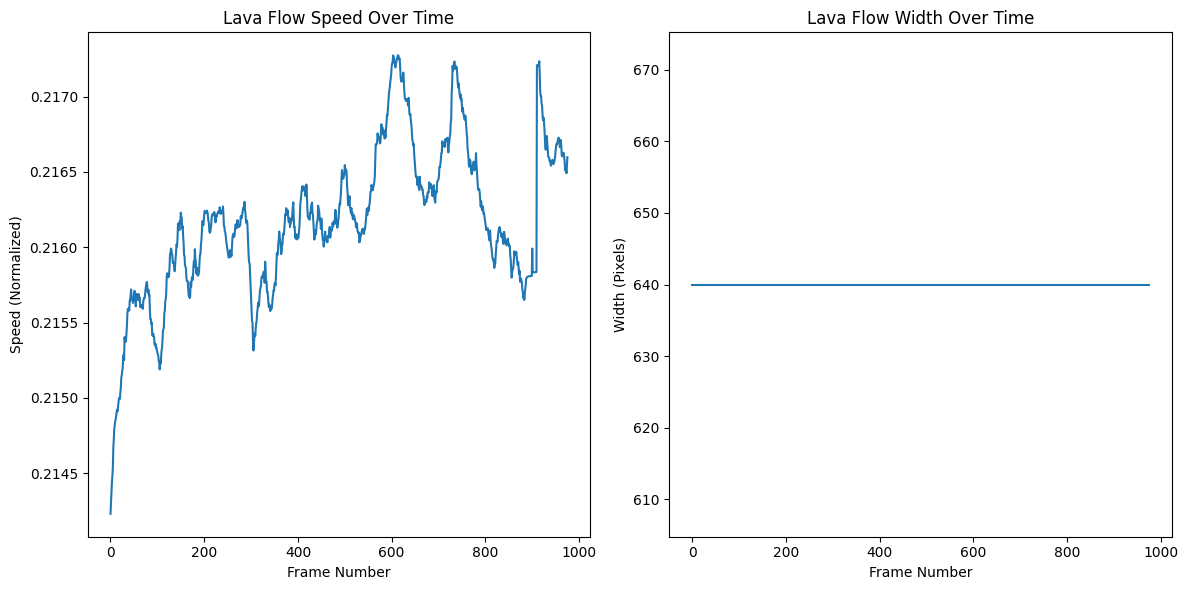

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to process the video and extract properties
def process_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error: Could not open video! Try again.")
        return
    
    # get video properties
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Initialize variables to store lava flow properties
    frame_count = 0
    flow_speeds = []
    flow_widths = []
    
    # start time for estimating remaining time
    start_time = time.time()
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # frame 2 grayscale for easier processing
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Example: placeholder
        flow_speed = np.mean(gray) / 255.0  # Placeholder for flow speed
        flow_width = gray.shape[1]  # Placeholder for flow width
        
        flow_speeds.append(flow_speed)
        flow_widths.append(flow_width)
        
        # Update progress
        frame_count += 1
        
        # Estimate remaining time
        elapsed_time = time.time() - start_time
        avg_time_per_frame = elapsed_time / frame_count
        remaining_frames = total_frames - frame_count
        remaining_time = remaining_frames * avg_time_per_frame
        
        # disp  progress and estimated time
        print(f"Processed {frame_count}/{total_frames} frames")
        print(f"Estimated time remaining: {remaining_time:.2f} seconds")
        print("------")
    
    # release the video capture object
    cap.release()
    
    # plot results
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(flow_speeds, label='Flow Speed')
    plt.title('Lava Flow Speed Over Time')
    plt.xlabel('Frame Number')
    plt.ylabel('Speed (Normalized)')
    
    plt.subplot(1, 2, 2)
    plt.plot(flow_widths, label='Flow Width')
    plt.title('Lava Flow Width Over Time')
    plt.xlabel('Frame Number')
    plt.ylabel('Width (Pixels)')
    
    plt.tight_layout()
    plt.show()

# video path
video_file_path = "lava flow.mp4"  # please replace with  actual file name

# Process 
process_video(video_file_path)

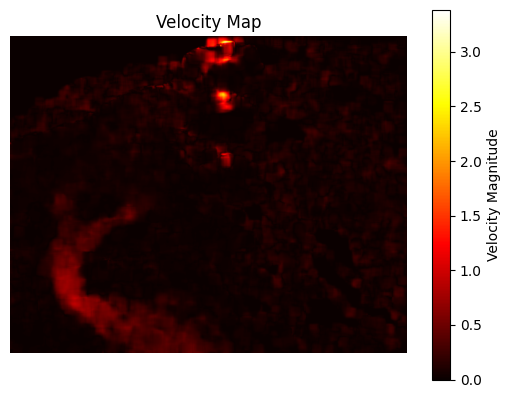

In [13]:
def calculate_velocity_map(video_path, frame_interval=1):
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error: Could not open video.")
        return None
    
    # Read the first frame
    ret, prev_frame = cap.read()
    if not ret:
        print("Error: Could not read the first frame.")
        return None
    
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    velocity_maps = []
    
    while True:
        # Skip frames based on the interval
        for _ in range(frame_interval):
            ret, frame = cap.read()
            if not ret:
                break
        
        if not ret:
            break
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Calculate optical flow
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        
        # Compute the magnitude of the flow vectors
        magnitude = np.sqrt(flow[..., 0]**2 + flow[..., 1]**2)
        velocity_maps.append(magnitude)
        
        prev_gray = gray
    
    cap.release()
    
    return velocity_maps

# Example usage
velocity_maps = calculate_velocity_map(video_file_path, frame_interval=5)

# Display the velocity map for the first frame
if velocity_maps:
    plt.imshow(velocity_maps[0], cmap='hot')
    plt.title("Velocity Map")
    plt.colorbar(label="Velocity Magnitude")
    plt.axis('off')
    plt.show()

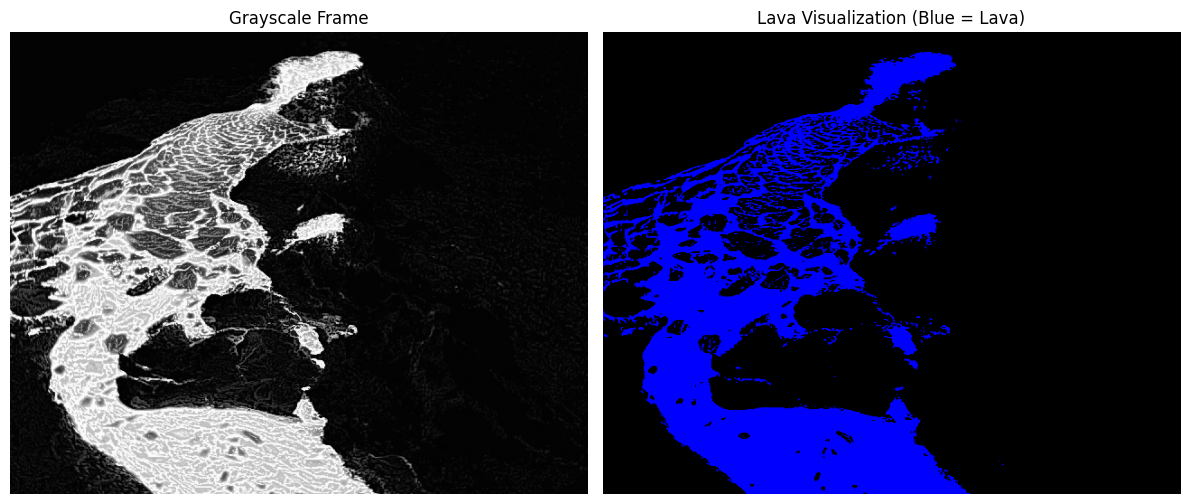

In [15]:
def visualize_lava_flow(video_path, frame_number=0, threshold=128):
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Set the video to the specified frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        print(f"Error: Could not read frame {frame_number}.")
        return
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to identify lava regions
    _, lava_mask = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    
    # Create a color visualization (red = lava, black = not lava)
    lava_visualization = np.zeros_like(frame)
    lava_visualization[lava_mask == 255] = [0, 0, 255]  # Red for lava
    
    # Display the result
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Frame')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(lava_visualization)
    plt.title('Lava Visualization (Blue = Lava)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
visualize_lava_flow(video_file_path, frame_number=0, threshold=128)

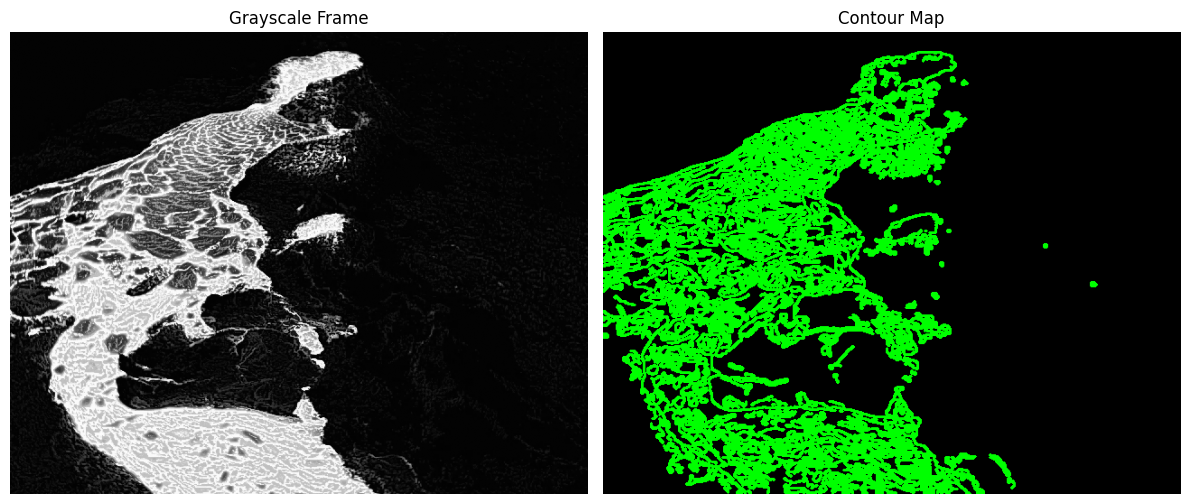

In [7]:
# Function to display a grayscale frame and its contour map
def display_frame_and_contour(video_path, frame_number=0):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Set the video to the specified frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    
    # Read the frame
    ret, frame = cap.read()
    if not ret:
        print(f"Error: Could not read frame {frame_number}.")
        return
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply a Gaussian blur to reduce noise (optional)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Detect edges using the Canny edge detector
    edges = cv2.Canny(blurred, 50, 150)
    
    # Find contours in the edge map
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on a blank image
    contour_map = np.zeros_like(frame)
    cv2.drawContours(contour_map, contours, -1, (0, 255, 0), 2)
    
    # Release the video capture object
    cap.release()
    
    # Display the grayscale frame and contour map
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Frame')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(contour_map)
    plt.title('Contour Map')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Specify the path to the uploaded video file
video_file_path = "lava flow.mp4"  # Replace with the actual file name

# Display a frame and its contour map (default is the first frame, frame_number=0)
display_frame_and_contour(video_file_path, frame_number=0)

# cv2.imwrite("grayscale_frame.png", grey)
# cv2.imwrite("contour_map.png", contour_map)